## CONFIGURATION & LOADING

In [1]:
#setup path
path = 'C:/Users/mark/Documents/GitHub/honours/dev/package/'
import sys; sys.path.append(path)

#standard imports
import numpy as np
import pandas as pd
import datetime

#configure display modes
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
rcParams['figure.figsize'] = 20,6

#load data first time from database
import analysis.dataPreparer as dp
df = dp.export_dataframe(path+"analysis/output/combo.db", "thirteen_sixteen")
df_backup = df.copy()
df.describe()

['', 'C:\\Anaconda3\\python35.zip', 'C:\\Anaconda3\\DLLs', 'C:\\Anaconda3\\lib', 'C:\\Anaconda3', 'c:\\anaconda3\\lib\\site-packages\\setuptools-23.0.0-py3.5.egg', 'C:\\Anaconda3\\lib\\site-packages', 'C:\\Anaconda3\\lib\\site-packages\\Sphinx-1.4.1-py3.5.egg', 'C:\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\mark\\.ipython', 'C:/Users/mark/Documents/GitHub/honours/dev/package/', '']
C:\Users\mark\Documents\GitHub\honours\dev\package\config\_logger.yaml
logManager - INFO - Default log config loaded
logManager - INFO - Logger created
logManager - INFO - export_dataframe | Started
logManager - INFO - export_dataframe | Passed | 107.81


,confidence_context_industry_category_main_dummy_ecommerce,confidence_context_industry_category_main_dummy_games_video,confidence_context_industry_category_main_dummy_other,confidence_context_industry_category_main_dummy_software,confidence_context_industry_category_main_dummy_web,confidence_context_industry_categories_list_ecommerce,confidence_context_industry_categories_list_mobile,confidence_context_industry_categories_list_social,confidence_context_industry_categories_list_social-media,confidence_context_industry_categories_list_software,...,outcome_raise_b_bool,outcome_raise_cplus_bool,outcome_ipo_valuation_number,outcome_ipo_duration,outcome_exit_duration,potential_structural_patents_citations_average_number,potential_structural_patents_citations_total_number,potential_structural_patents_cited_by_average_number,potential_structural_patents_cited_by_total_number,potential_structural_patents_count_number
count,60001.000000,60001.000000,60001.000000,60001.000000,60001.000000,12394.000000,12394.000000,12394.000000,12394.000000,12394.000000,...,38752.000000,38752.0,1.803600e+05,3.437000e+03,6.630000e+02,18475.000000,1.847500e+04,18475.000000,18475.000000,18475.000000
mean,0.146081,0.121831,0.199797,0.288062,0.244229,0.183476,0.370179,0.183637,0.203001,0.188398,...,0.052849,0.0,8.256491e+06,6.924756e+08,8.418914e+08,31.587891,3.331895e+03,19.439178,1623.539215,123.193559
std,0.353190,0.327094,0.399851,0.452864,0.429633,0.387072,0.482872,0.387204,0.402250,0.391045,...,0.223735,0.0,1.008083e+09,1.024880e+09,9.305499e+08,54.586234,2.533279e+04,40.074088,12384.548709,1088.838778
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,-1.071878e+09,-2.885760e+07,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,1.620000e+08,3.621456e+08,10.160838,3.500000e+01,3.583333,16.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,3.194208e+08,5.284224e+08,16.324324,1.650000e+02,9.000000,84.000000,8.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,6.807456e+08,9.191664e+08,30.333333,9.505000e+02,19.000000,467.000000,34.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,3.187865e+11,1.054771e+10,8.032349e+09,1720.764706,1.030812e+06,1017.000000,516154.000000,66401.000000


In [97]:
#reload data from memory
df = df_backup
#df.describe()

## CREATE LABEL & FEATURES

In [2]:
#Select label & logically constrain data


df = df.loc[df['confidence_performance_other_operating_bool'] == 1]
df = df.loc[df['confidence_validation_funding_rounds_number'] >= 1]

#1 - Did the company exit?
#label = "outcome_exit_bool"

#2 - Did the company raise more rounds?
df["outcome_funding_more_rounds_number"] = df["outcome_funding_rounds_number"] - df["confidence_validation_funding_rounds_number"]
df["outcome_funding_more_rounds_bool"] = df["outcome_funding_more_rounds_number"].apply(lambda x: 1 if x > 0 else 0)
label = "outcome_funding_more_rounds_bool"

#3 - Did the company close?
#label = "outcome_closed_bool"

company_names = df[["keys_company_name",label]]

y = df[label]
#y.value_counts()

#Select features
df = df.select_dtypes(['number'])
drops = [col for col in list(df) if col.startswith(("key","from","outcome","index"))]
X = df.drop(drops, axis=1)
features = list(X)
sorted(features)

#Combine features & label
df = pd.concat([df[features], df[label]], axis=1)
df.describe()

,confidence_context_industry_category_main_dummy_ecommerce,confidence_context_industry_category_main_dummy_games_video,confidence_context_industry_category_main_dummy_other,confidence_context_industry_category_main_dummy_software,confidence_context_industry_category_main_dummy_web,confidence_context_industry_categories_list_ecommerce,confidence_context_industry_categories_list_mobile,confidence_context_industry_categories_list_social,confidence_context_industry_categories_list_social-media,confidence_context_industry_categories_list_software,...,confidence_validation_media_milestones_first_date_to_confidence_performance_financial_ipo_date_duration,confidence_validation_media_milestones_last_date_to_confidence_performance_financial_ipo_date_duration,confidence_validation_media_milestones_last_date_to_confidence_validation_media_milestones_first_date_duration,confidence_economy_broader_keys_now_date_SP500_number,potential_structural_patents_citations_average_number,potential_structural_patents_citations_total_number,potential_structural_patents_cited_by_average_number,potential_structural_patents_cited_by_total_number,potential_structural_patents_count_number,outcome_funding_more_rounds_bool
count,8551.000000,8551.000000,8551.000000,8551.000000,8551.000000,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000,...,0.0,0.0,3.759000e+03,25408.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,25408.000000
mean,0.158227,0.121038,0.058473,0.430476,0.231786,0.174419,0.463512,0.196472,0.163593,0.134723,...,NaN,NaN,-2.056240e+07,1940.284462,45.148492,1676.658017,11.804983,524.225992,39.343313,0.383304
std,0.364975,0.326191,0.234649,0.495172,0.421998,0.379545,0.498767,0.397409,0.369980,0.341496,...,NaN,NaN,5.028749e+07,636.826513,76.476223,8774.219036,22.027092,5534.577218,356.509493,0.486201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,-1.082074e+09,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,-2.363040e+07,2161.740000,12.000000,46.000000,2.000000,9.000000,3.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000e+00,2172.470000,21.250000,187.000000,5.727273,44.000000,8.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000e+00,2172.470000,45.000000,826.000000,12.750000,194.000000,21.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,0.000000e+00,2190.150000,1720.764706,300996.000000,592.000000,336442.000000,21589.000000,1.000000


In [5]:
sorted(features)

['confidence_context_broader_founded_date',
 'confidence_context_broader_offices_country_list_can',
 'confidence_context_broader_offices_country_list_deu',
 'confidence_context_broader_offices_country_list_gbr',
 'confidence_context_broader_offices_country_list_ind',
 'confidence_context_broader_offices_country_list_usa',
 'confidence_context_broader_offices_headquarters_country_dummy_can',
 'confidence_context_broader_offices_headquarters_country_dummy_deu',
 'confidence_context_broader_offices_headquarters_country_dummy_gbr',
 'confidence_context_broader_offices_headquarters_country_dummy_ind',
 'confidence_context_broader_offices_headquarters_country_dummy_usa',
 'confidence_context_industry_categories_list_ecommerce',
 'confidence_context_industry_categories_list_mobile',
 'confidence_context_industry_categories_list_social',
 'confidence_context_industry_categories_list_social-media',
 'confidence_context_industry_categories_list_software',
 'confidence_context_industry_category_m

In [99]:
#df.loc[company_names.loc[y == 1].index]
test = pd.concat([df,company_names.loc[y == 1]],axis=1,join="inner")
test

,confidence_context_industry_category_main_dummy_ecommerce,confidence_context_industry_category_main_dummy_games_video,confidence_context_industry_category_main_dummy_other,confidence_context_industry_category_main_dummy_software,confidence_context_industry_category_main_dummy_web,confidence_context_industry_categories_list_ecommerce,confidence_context_industry_categories_list_mobile,confidence_context_industry_categories_list_social,confidence_context_industry_categories_list_social-media,confidence_context_industry_categories_list_software,...,confidence_validation_media_milestones_last_date_to_confidence_validation_media_milestones_first_date_duration,confidence_economy_broader_keys_now_date_SP500_number,potential_structural_patents_citations_average_number,potential_structural_patents_citations_total_number,potential_structural_patents_cited_by_average_number,potential_structural_patents_cited_by_total_number,potential_structural_patents_count_number,outcome_closed_bool,keys_company_name,outcome_closed_bool
28,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,...,NaN,2172.47,NaN,NaN,NaN,NaN,NaN,1,Diditz,1
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2172.47,NaN,NaN,NaN,NaN,NaN,1,Popego,1
125,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,2172.47,NaN,NaN,NaN,NaN,NaN,1,Tingz,1
185,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2186.16,NaN,NaN,NaN,NaN,NaN,1,Twonq,1
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1979.26,NaN,NaN,NaN,NaN,NaN,1,AdRocket,1
322,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2172.47,NaN,NaN,NaN,NaN,NaN,1,Quant the News,1
338,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,NaN,2164.25,NaN,NaN,NaN,NaN,NaN,1,IntroFly,1
471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2172.47,NaN,NaN,NaN,NaN,NaN,1,SoMoLend,1
667,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,NaN,NaN,NaN,NaN,NaN,1,Red Seraphim,1
784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2172.47,NaN,NaN,NaN,NaN,NaN,1,AI Exchange,1


## PRE-PROCESSING

In [84]:
#Set up pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.naive_bayes import GaussianNB

pipe = Pipeline(steps=[
    ("imputer", Imputer()),
    ("scaler", StandardScaler()),
    ("NB", GaussianNB())
])

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = dict(
    imputer__strategy = ["mean", "median", "most_frequent"],
    scaler = [StandardScaler(), RobustScaler()]
)

#Set up scoring
from sklearn import metrics
mc_scorer = metrics.make_scorer(metrics.matthews_corrcoef)

#Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#Grid search and fit
clf = GridSearchCV(pipe, param_grid=param_grid, cv=3, scoring = mc_scorer, verbose=0)
clf.fit(X_train, y_train)
pp_params = clf.best_params_

KeyboardInterrupt: 

In [ ]:
#Explore results
print("Best parameters set found on development set:\n")
print(clf.best_params_,"\n")
print("Grid scores on development set:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

print("\nDetailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.\n")
y_true, y_pred = y_test, clf.predict(X_test)
print(metrics.classification_report(y_true, y_pred),"\n")

#Plot results

In [ ]:
#reload best pre-processing params
pp_params = dict(
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True), 
    imputer__strategy = 'most_frequent'
)

## EXPLORATORY ANALYSIS

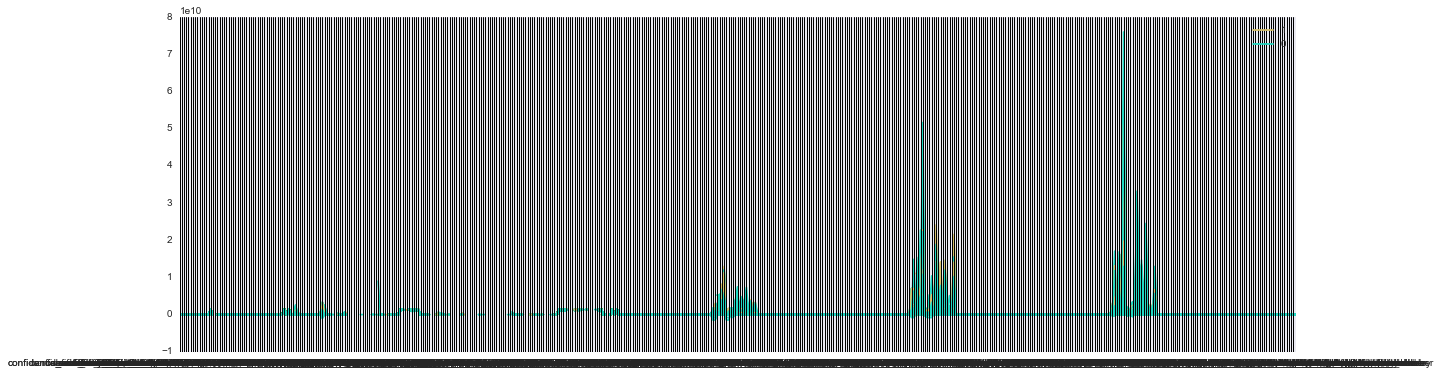

AttributeError: 'DataFrame' object has no attribute 'funding_raised_total_value_number'

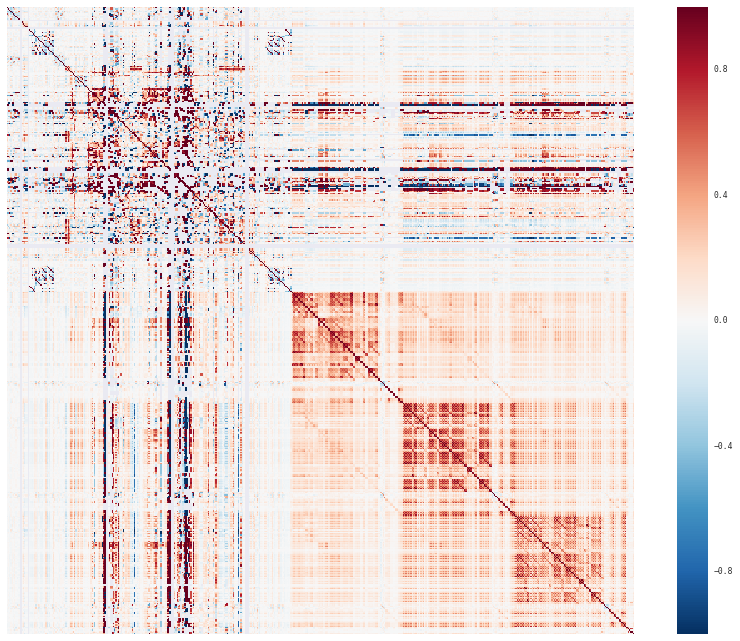

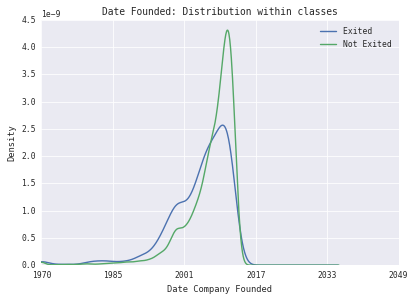

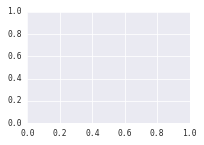

In [92]:
#SUMMARY ANALYSIS

#parallel coordinates
from pandas.tools.plotting import parallel_coordinates
plt.figure()
parallel_coordinates(df, label)
plt.show()

#intercorrelations
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(), vmax=1, square=True, xticklabels = False, yticklabels =False)
f.tight_layout()

#FEATURE ANALYSIS

#Age of company
plt.figure()
fig, ax = plt.subplots()
founded_date = df["confidence_context_broader_founded_date"]
founded_date[df[label] == 1].plot(kind='kde')    
founded_date[df[label] == 0].plot(kind='kde') 
plt.xlim(xmin=0)
xticks = ax.get_xticks()
xlabels = [datetime.datetime.fromtimestamp(int(x)).strftime('%Y') for x in xticks]
ax.set_xticklabels(xlabels)
plt.xlabel("Date Company Founded")    
plt.title("Date Founded: Distribution within classes")
plt.legend(('Exited ', 'Not Exited'),loc='best') 

#Funding raised
fig = plt.figure()

#Total Funding Raised
ax1 = fig.add_subplot(221)
df.funding_raised_total_value_number[df.outcome_exit_bool == 1].plot(kind='kde')    
df.funding_raised_total_value_number[df.outcome_exit_bool == 0].plot(kind='kde') 
ax1.set_xscale('log')
plt.xlabel("Total Funding Raised")    
plt.title("Funding Raised (Total): Distribution within classes")
plt.legend(('Exited', 'Not Exited'),loc='best') 

#Average Funding Raised
ax2 = fig.add_subplot(222)
df.funding_raise_average_number[df.outcome_exit_bool == 1].plot(kind='kde')    
df.funding_raise_average_number[df.outcome_exit_bool == 0].plot(kind='kde') 
ax2.set_xscale('log')
plt.xlabel("Average Funding Raised per Round")    
plt.title("Funding Raised (Average): Distribution within classes")
plt.legend(('Exited', 'Not Exited'),loc='best') 

#Number of Funding Rounds
ax3 = fig.add_subplot(223)
df.funding_rounds_number[df.outcome_exit_bool == 1].plot(kind='kde')    
df.funding_rounds_number[df.outcome_exit_bool == 0].plot(kind='kde') 
plt.xlabel("Number of Funding Rounds")    
plt.title("Funding Rounds: Distribution within classes")
plt.legend(('Exited', 'Not Exited'),loc='best') 


alliances 1
patents 3
awards 2
local 7
staff 20
broader 6
founders 18
influence 6
directors 16
industry 12


ValueError: No feature in X meets the variance threshold 0.00000

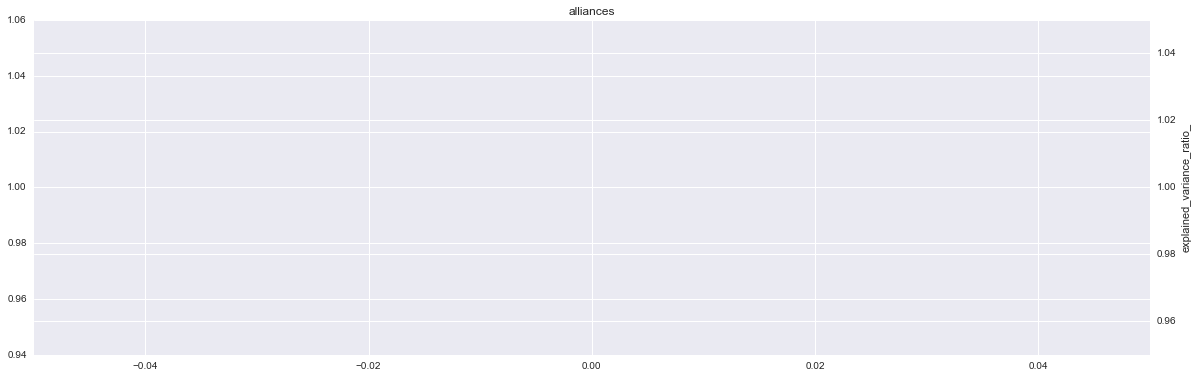

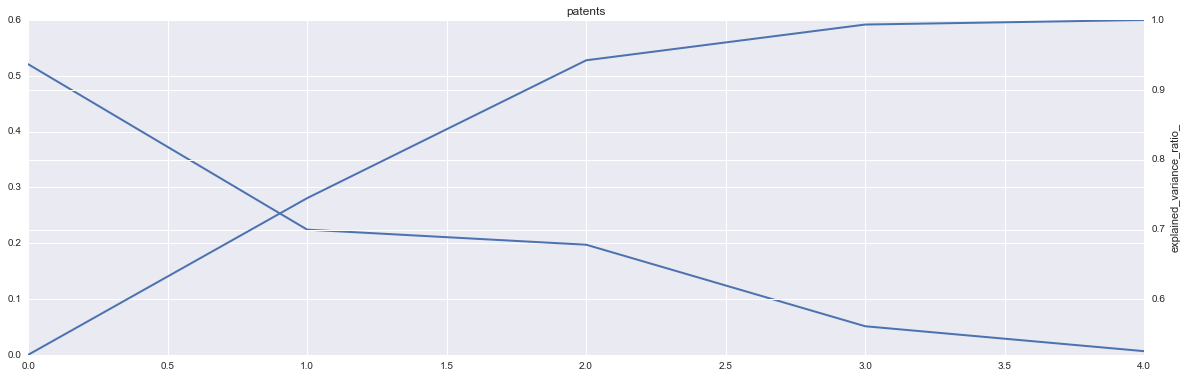

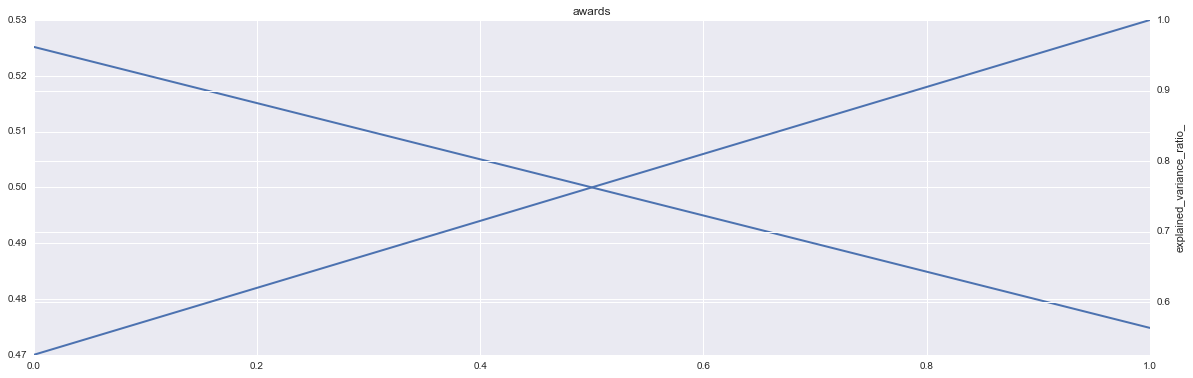

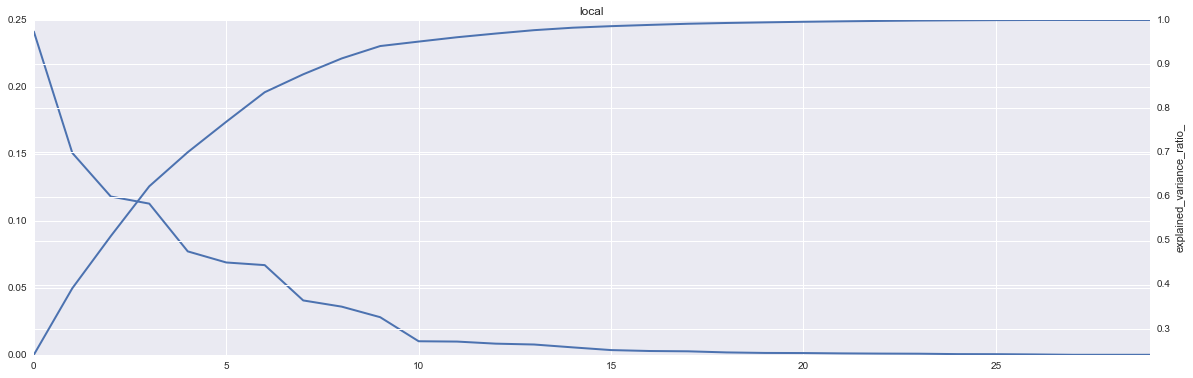

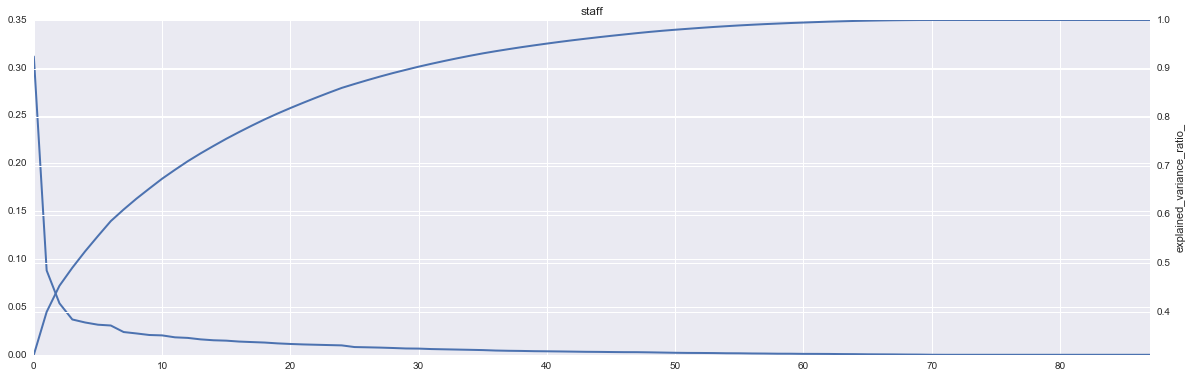

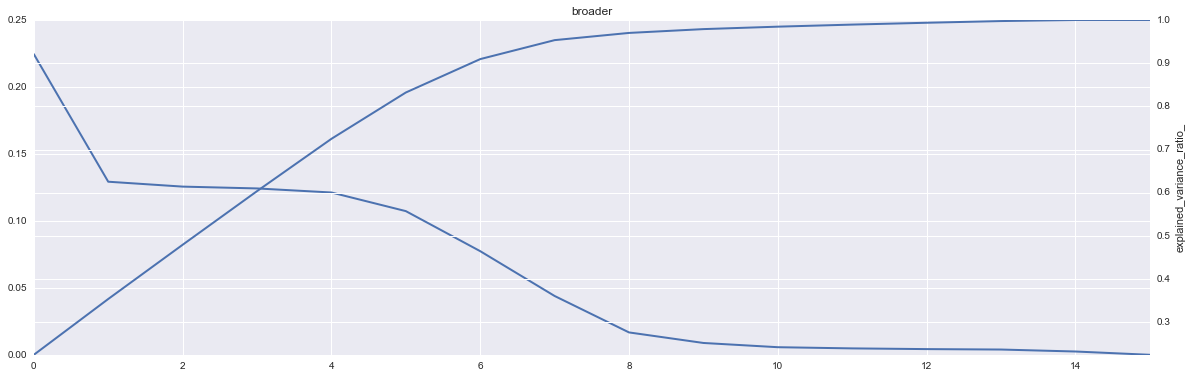

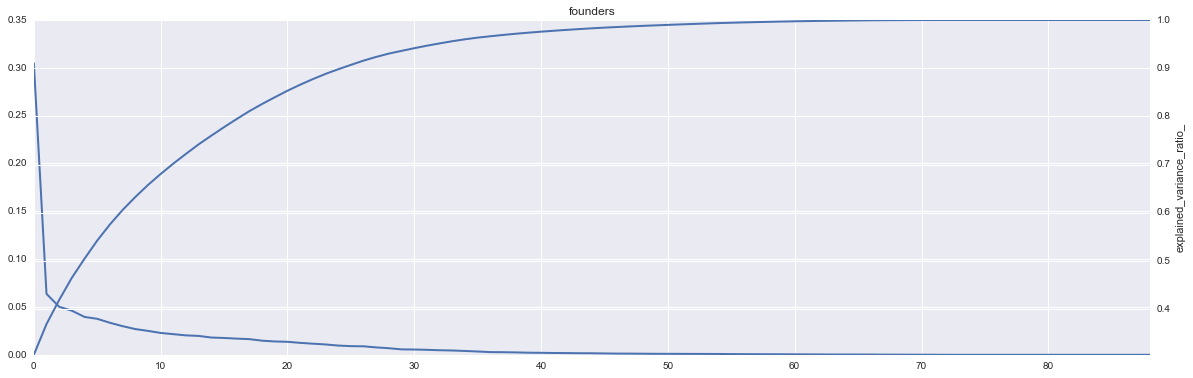

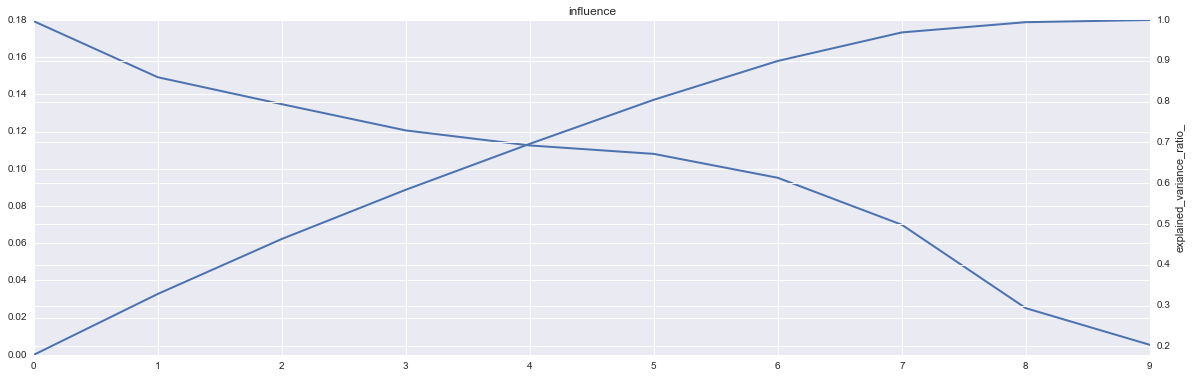

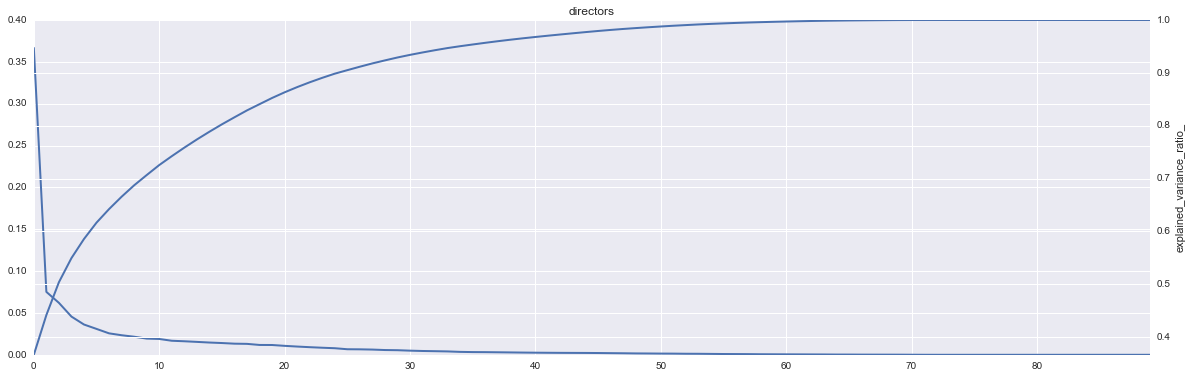

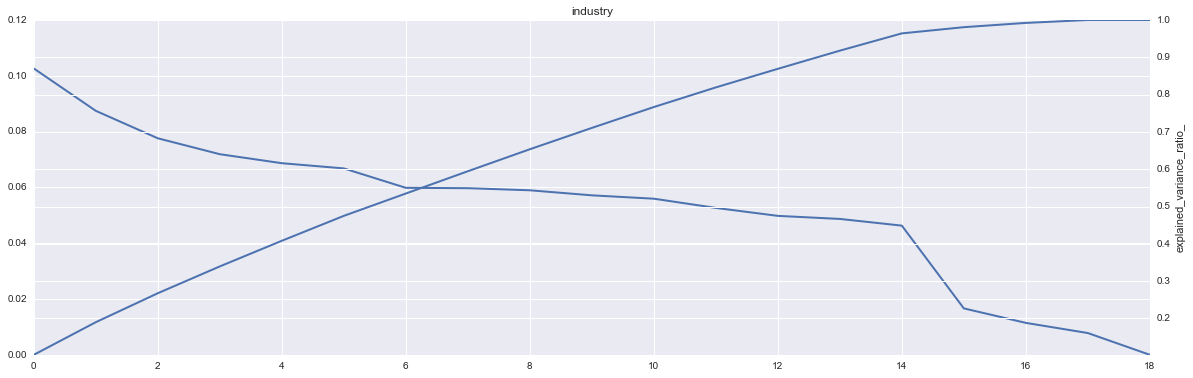

In [86]:
from collections import defaultdict
groups = defaultdict(list)

for feature in features:
    key = feature.split("_")[2]
    groups[key].append(feature)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

pipe = Pipeline(steps=[
    ("imputer", Imputer()),
    ("scaler", StandardScaler()),
    ("thresholder", VarianceThreshold())
])    

for group in groups:
    data = df[groups[group]]
    data = pipe.fit_transform(data)
    from sklearn.decomposition import PCA
    pca = PCA().fit(data)
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(pca.explained_variance_ratio_, linewidth=2)
    cum = np.cumsum(pca.explained_variance_ratio_)
    n_comp = next(x[0] for x in enumerate(cum) if x[1] > 0.8) + 1
    print(group, n_comp)
    ax2.plot(cum, linewidth=2)
    plt.axis('tight')
    plt.title(group)
    plt.xlabel('n_components')
    plt.ylabel('explained_variance_ratio_')
    list(pca.explained_variance_ratio_)

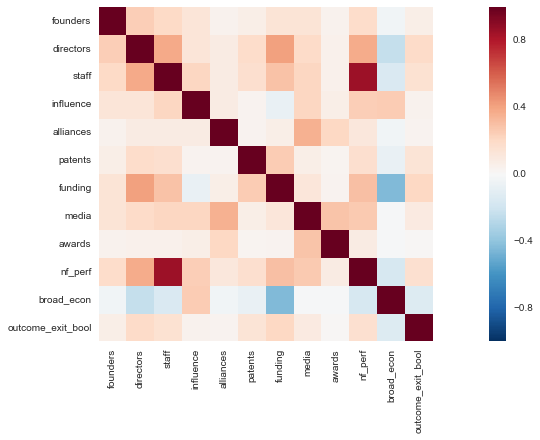

In [88]:
features_list = [
    "potential_human_founders_companies_operating_director_average_number",
    "potential_human_directors_companies_exits_all_average_number",
    "potential_human_staff_jobs_all_average_number",
    "potential_social_influence_twitter_bool",
    "potential_social_alliances_milestones_count_alliance_number",
    "potential_structural_patents_count_number",
    "confidence_validation_funding_raised_total_value_number",
    "confidence_validation_investors_count_funded_exit_total_max_number",
    "confidence_validation_media_milestones_count_all_number",
    "confidence_validation_awards_milestones_count_awards_number",
    "confidence_performance_other_staff_all_total_number",
    "confidence_context_broader_founded_date",
    "confidence_context_industry_category_main_dummy",
    "confidence_context_local_offices_headquarters_state_ca"
]

features_new_list = [
    "founders",
    "directors",
    "staff",
    "influence",
    "alliances",
    "patents",
    "funding",
    "media",
    "awards",
    "nf_perf",
    "broad_econ",
    "industry",
    "local_econ"
]

features = df[features_list]
features.columns = features_new_list
df_small = pd.concat([features, df[label]], axis=1)

sns.heatmap(df_small.corr(method="spearman"), square=True)
#sns.pairplot(df_small, hue=label,dropna=True)
sns.plt.show()

In [ ]:
#Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#Setup pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

pipe = Pipeline(steps=[
    ("imputer", Imputer()),
    ("scaler", StandardScaler()),
    ("thresholder", VarianceThreshold()),
    ("extracter", SelectKBest(k=20)),
    ("clf", GaussianNB())
])

#Setup scorer
from sklearn import metrics

def scorer(y_true, y_pred, **kwargs):
    mc = metrics.matthews_corrcoef(y_true, y_pred)
    roc_auc = metrics.roc_auc_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    print("mc:", mc, "auc:", roc_auc, "f1:", f1)
    return mc

mc_scorer = metrics.make_scorer(scorer)

#Fit model 
pipe.fit(X_train, y_train)
pipe.predict(X_test)
#pipe.score(X_test, y_test, scorer=mc_scorer)

#Get features
#features = pipe.get_feature_names()
features = pipe.named_steps['extracter'].get_support(indices=True)
features = list(X_train.iloc[:,features])

print(features)

#plot features
_ = sns.pairplot(df, vars=features, hue=label, size=1.5)
_ = sns.corrplot(df, vars=features, annot=False)

## FEATURE EXTRACTION

In [ ]:
#Principal Components Analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA().fit(X_scaled)
fig, ax1 = plt.subplots()
#ax1.set_xscale("log")
ax2 = ax1.twinx()
ax1.plot(pca.explained_variance_ratio_, linewidth=2)
cumulative = np.cumsum(pca.explained_variance_ratio_)
ax2.plot(cumulative, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
list(pca.explained_variance_ratio_)

#Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA().fit(X_scaled, y)
fig, ax1 = plt.subplots()
#ax1.set_xscale("log")
ax2 = ax1.twinx()
ax1.plot(lda.explained_variance_ratio_, linewidth=2)
cumulative = np.cumsum(lda.explained_variance_ratio_)
ax2.plot(cumulative, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
list(lda.explained_variance_ratio_)

#Factor Analysis - takes foreeeverr
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components = 5).fit(X_scaled, y)
print(fa.components_)

In [ ]:
#Set up pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

pipe = Pipeline(steps=[
    ("imputer", Imputer()),
    ("scaler", StandardScaler()),
    ("thresholder", VarianceThreshold()),
    ("extracter", PCA()),
    ("clf", GaussianNB())
])

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#pipe.set_params(**pp_params)

fe_param_grid = [
    dict(
        extracter = [PCA()],
        extracter__n_components = [5, 10, 25, 50, 100],
    ),
    dict(
        extracter = [SelectKBest()],
        extracter__k = (5, 10, 25, 50, 100),
        extracter__score_func = [f_classif, mutual_info_classif, chi2]
    )
]

print(fe_param_grid)

#Setup scorer
from sklearn import metrics

def scorer(y_true, y_pred, **kwargs):
    mc = metrics.matthews_corrcoef(y_true, y_pred)
    roc_auc = metrics.roc_auc_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    print("mc:", mc, "auc:", roc_auc, "f1:", f1)
    return mc

mc_scorer = metrics.make_scorer(scorer)

#Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#Grid search and fit
fe_clf = GridSearchCV(pipe, param_grid=fe_param_grid, cv=3, scoring = mc_scorer, verbose=2, return_train_score=False)
fe_clf.fit(X_train, y_train)
fe_params = fe_clf.best_params_

In [ ]:
#Explore results
print("Best parameters set found on development set:\n")
print(fe_clf.best_params_,"\n")
print("Grid scores on development set:\n")
means = fe_clf.cv_results_['mean_test_score']
stds = fe_clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, fe_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

print("\nDetailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.\n")
y_true, y_pred = y_test, fe_clf.predict(X_test)
print(metrics.classification_report(y_true, y_pred),"\n")

#Plot results

In [ ]:
#----------ALGORITHM COMPARISON----------#

#Setup pre-processors

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.naive_bayes import GaussianNB

pipe = Pipeline(steps=[
    ("imputer", Imputer()),
    ("scaler", StandardScaler()),
    ("thresholder", VarianceThreshold()),
    ("extracter", SelectKBest()),
    ("clf", GaussianNB())
])

#Setup classifiers

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

CLASSIFIERS = [
    ("Naive Bayes", GaussianNB()),
    ("Logistic Regression", LogisticRegression(C=1e5)),
    ("K-Nearest Neighbours", KNeighborsClassifier(3)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=5)),
    ("Random Forest", RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
    ("Linear SVM", SVC(kernel="linear", C=0.025)),
    ("RBF SVM", SVC(gamma=2, C=1)),
    ("Neural Net", MLPClassifier(alpha=1))
]

#Setup scorer
from sklearn import metrics

def scorer(y_true, y_pred, **kwargs):
    mc = metrics.matthews_corrcoef(y_true, y_pred)
    roc_auc = metrics.roc_auc_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    print("mc:", mc, "auc:", roc_auc, "f1:", f1)
    return mc

mc_scorer = metrics.make_scorer(scorer)

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = [
    dict(
        clf = [GaussianNB()]
    ),
    dict(
        clf = [LogisticRegression()], 
        clf__C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    ),
    dict(
        clf = [KNeighborsClassifier()], 
        clf__weights = ['uniform','distance'],
        clf__n_neighbors = [5,6,7,8,9,10]
    ),
    dict(
        clf = [DecisionTreeClassifier()],
        clf__criterion = ["gini", "entropy"],
        clf__max_depth = [5, 10],
        clf__class_weight = [None, "balanced"]
    ),
    dict(
        clf = [RandomForestClassifier()], 
        clf__n_estimators = [5],
        clf__criterion = ["gini", "entropy"],
        clf__max_depth = [5, 10],
        clf__class_weight = [None, "balanced"]
    )#,
    #dict(
    #    clf = [SVC()],
    #    clf__kernel = ["linear", "rbf", "poly", "sigmoid"],
    #    clf__C = [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    #),
]

#Run comparison

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict

#Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#Grid search and fit
clf = GridSearchCV(pipe, param_grid=param_grid, cv=3, scoring = mc_scorer, verbose=2, return_train_score=False)
clf.fit(X_train, y_train)
params = clf.best_params_

"""
for name, clf in CLASSIFIERS:
    print('Classifier Type:', name)
    pipe = make_pipeline(*PREPROCESSORS, clf)
    scores = cross_val_score(pipe, X, y, cv=3, scoring=mc_scorer,verbose=1)
    print('CV Scores (Matthews CC):', scores)
    print("CV Avg (Matthews CC): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print('-'*20, '\n')"""

In [ ]:
params

In [8]:
#----------RANDOM FOREST TEST----------#

#preamble
print('\n','-'*20)
print("Classification Results")
print("\n")
print("Features Date:", "December 2013")
print("Labels Date:", "September 2016")
print("Selected Label:", label)
print("Selected Classifier:", "Random Forest")

#Set up pipeline

from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    Imputer(),
    StandardScaler(),
    VarianceThreshold(),
    #SelectKBest(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
)

#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Classification
clf_fit = pipe.fit(X_train, y_train)
y_pred = clf_fit.predict(X_test)
y_prob = clf_fit.predict_proba(X_test)

# Feature importances
print('\n')
print('Feature Importances (Top 10):')
_,clf = pipe.steps[-1]
zipped = list(zip(list(X), clf.feature_importances_))
zipped.sort(key = lambda t: t[1],reverse=True)
for i, j in zipped[:30]: 
    print("{}: {:.4f}".format(i, j))
    
"""
#Plot most important features
fig = plt.figure(figsize=(20,20))

n = 9
sr_n = n**(1.0/2)

for x, (i, j) in enumerate(zipped[0:n]):
    ax = fig.add_subplot(sr_n, sr_n, x+1)
    df[i][df[label] == 1].plot(kind='kde')    
    df[i][df[label] == 0].plot(kind='kde')
    ax.set_xscale('log')
    plt.title(i)
    plt.legend(('Exited', 'Not Exited'),loc='best') 
"""
#Test results
from sklearn import metrics
mc_scorer = metrics.make_scorer(metrics.matthews_corrcoef)
classification_report = metrics.classification_report(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
test_accuracy = clf_fit.score(X_test, y_test)
test_matthews = metrics.matthews_corrcoef(y_test, y_pred)
print('\nClassification Report:', classification_report)
print('Confusion Matrix:', confusion_matrix)
print('Test Accuracy:', test_accuracy)
print('Test Matthews corrcoef', test_matthews)

#Cross-fold validation
from sklearn.model_selection import KFold, cross_val_score
scores = cross_val_score(pipe, X, y, cv=5, scoring=mc_scorer)
print('\nCross-validation scores:', scores)
print("CV Avg Matthews CC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('-'*20, '\n')

"""
#Plot results
from statsmodels.nonparametric.kde import KDEUnivariate

kde_res = KDEUnivariate(RF_prob)
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density)
plt.title("Distribution of our Predictions")
"""


 --------------------
Classification Results


Features Date: December 2013
Labels Date: September 2016
Selected Label: outcome_funding_more_rounds_bool
Selected Classifier: Random Forest


Feature Importances (Top 10):
potential_human_directors_jobs_current_average_number: 0.0719
potential_human_directors_jobs_director_average_number: 0.0634
potential_human_directors_degrees_count_engineering_total_number: 0.0429
potential_human_directors_degrees_count_masters_total_number: 0.0404
confidence_validation_funding_code_date_pair_convertible_pair: 0.0395
confidence_validation_awards_milestones_count_awards_grants_number: 0.0387
confidence_validation_investors_count_funded_rounds_average_average_number: 0.0342
confidence_context_industry_description_short_text_online: 0.0319
confidence_validation_funding_raised_amount_type_number_pair_crowdfunding_pair: 0.0291
potential_human_directors_funding_rounds_past_total_number: 0.0281
confidence_validation_investors_funding_coparticipants_total_sum

'\n#Plot results\nfrom statsmodels.nonparametric.kde import KDEUnivariate\n\nkde_res = KDEUnivariate(RF_prob)\nkde_res.fit()\nplt.plot(kde_res.support,kde_res.density)\nplt.fill_between(kde_res.support,kde_res.density)\nplt.title("Distribution of our Predictions")\n'